<a href="https://colab.research.google.com/github/jeriko13/skripsi/blob/main/Suhu_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Mengupload file dari lokal ke Colab
uploaded = files.upload()

# Memindahkan file yang telah diupload ke direktori Colab
for filename in uploaded.keys():
  !mv "{filename}" /content/


Saving df_rainfall.csv to df_rainfall.csv
mv: 'df_rainfall.csv' and '/content/df_rainfall.csv' are the same file


In [16]:
# read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("df_rainfall.csv" ,na_values=0,header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])
#df
# Memilih hanya 50 baris data pertama
df_50 = df.iloc[:50]

# Menampilkan 50 baris data pertama

df.head(50)

,Date,dewpoint,temperature,rainfall
0,01/01/2017,"297,691","303,931","0,01"
1,02/01/2017,"297,72","303,498","0,012"
2,03/01/2017,"297,736","302,315","0,02"
3,04/01/2017,"297,772","302,133","0,016"
4,05/01/2017,"297,78","302,281","0,014"
5,06/01/2017,"297,758","302,529","0,002"
6,07/01/2017,"297,504","303,647","0,003"
7,08/01/2017,"297,401","303,459","0,003"
8,09/01/2017,"297,697","301,818","0,018"
9,10/01/2017,"297,777","302,498","0,012"


In [17]:
#menampilkan daftar kolom pada DataFrame.
df.columns


Index(['Date', 'dewpoint', 'temperature', 'rainfall'], dtype='object')

In [18]:
#Untuk menghapus baris yang memiliki nilai NaN di semua kolom
df.dropna(how='all', inplace=True)


In [19]:
#mengetahui jumlah baris data
df.tail

<bound method NDFrame.tail of           Date dewpoint temperature rainfall
0   01/01/2017  297,691     303,931     0,01
1   02/01/2017   297,72     303,498    0,012
2   03/01/2017  297,736     302,315     0,02
3   04/01/2017  297,772     302,133    0,016
4   05/01/2017   297,78     302,281    0,014
5   06/01/2017  297,758     302,529    0,002
6   07/01/2017  297,504     303,647    0,003
7   08/01/2017  297,401     303,459    0,003
8   09/01/2017  297,697     301,818    0,018
9   10/01/2017  297,777     302,498    0,012
10  11/01/2017  297,851     302,931    0,005
11  12/01/2017  297,885      303,57     0,02
12  13/01/2017  297,665     302,621    0,004
13  14/01/2017  297,003     301,931    0,021
14  15/01/2017  297,069     302,465    0,001
15  16/01/2017  297,258     302,138    0,008
16  17/01/2017  297,159     302,415    0,006
17  18/01/2017  297,181     302,668    0,006
18  19/01/2017  297,275     303,205    0,012
19  20/01/2017  297,228     303,056    0,007
20  21/01/2017  297,389  

In [20]:
#mengubah , menjadi .
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

In [21]:
#mengubah tipe data ke numerik
pd.to_numeric(df['dewpoint'], errors='coerce')
pd.to_numeric(df['temperature'], errors='coerce')
pd.to_numeric(df['rainfall'], errors='coerce')


0     0.010
1     0.012
2     0.020
3     0.016
4     0.014
5     0.002
6     0.003
7     0.003
8     0.018
9     0.012
10    0.005
11    0.020
12    0.004
13    0.021
14    0.001
15    0.008
16    0.006
17    0.006
18    0.012
19    0.007
20    0.012
21    0.018
22    0.011
23    0.015
24    0.012
25    0.002
26    0.007
27    0.006
28    0.012
29    0.002
30    0.010
31    0.016
32    0.005
33    0.006
34    0.014
35    0.002
36    0.005
37    0.006
38    0.007
39    0.015
40    0.018
41    0.015
42    0.004
43    0.032
44    0.015
45    0.015
46    0.004
47    0.009
48    0.004
49    0.011
50    0.006
Name: rainfall, dtype: float64

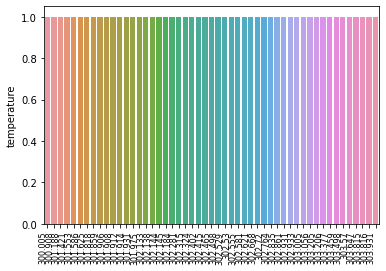

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# mengambil data suhu yang tidak kosong
df_clean = df.dropna(subset=['temperature'])

# membuat plot bar
ax = sns.barplot(x=df_clean["temperature"].value_counts().index, y=df_clean["temperature"].value_counts())

# menambahkan jarak antara label pada sumbu x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)

# menampilkan plot
plt.show()


In [23]:
#untuk mengecek tipe data
print(df['Date'].dtype)
print(df['dewpoint'].dtype)
print(df['temperature'].dtype)
print(df['rainfall'].dtype)


object
float64
float64
float64


In [24]:
#Code tersebut melakukan konversi kolom dalam dataframe (df) menjadi tipe data numerik 
df['dewpoint'] = pd.to_numeric(df['dewpoint'], errors='coerce')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['rainfall'] = pd.to_numeric(df['rainfall'], errors='coerce')

In [25]:
import numpy as np
import matplotlib.pyplot as plt
df['temperature'] = pd.to_numeric(df.iloc[:,1], errors='coerce')
#menghitung rata-rata berjalan (rolling mean)  dengan jendela sepanjang 3 baris
df['temperature'] = df.iloc[:,1].rolling(window=5).mean()
df.head(50)

,Date,dewpoint,temperature,rainfall
0,01/01/2017,297.691,NaN,0.010
1,02/01/2017,297.720,NaN,0.012
2,03/01/2017,297.736,NaN,0.020
3,04/01/2017,297.772,NaN,0.016
4,05/01/2017,297.780,297.7398,0.014
5,06/01/2017,297.758,297.7532,0.002
6,07/01/2017,297.504,297.7100,0.003
7,08/01/2017,297.401,297.6430,0.003
8,09/01/2017,297.697,297.6280,0.018
9,10/01/2017,297.777,297.6274,0.012


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Konversi tipe data kolom 'rainfall' dari object ke float64
#df['dewpoint'] = pd.to_numeric(df.iloc[:,3], errors='coerce')
#df['temperature'] = pd.to_numeric(df.iloc[:,3], errors='coerce')
df['temperature'] = pd.to_numeric(df.iloc[:,1], errors='coerce')

# Menghitung rata-rata berjalan (rolling mean) pada kolom 'temperature' dengan jendela sepanjang 3 baris, dan menyimpan hasilnya pada kolom 'temperature' di DataFrame df

df['prediksi'] = df.iloc[:,1].rolling(window=5).mean()
# Menampilkan 50 baris pertama dari DataFrame df
print(df.head(50))


          Date  dewpoint  temperature  rainfall  prediksi
0   01/01/2017   297.691      297.691     0.010       NaN
1   02/01/2017   297.720      297.720     0.012       NaN
2   03/01/2017   297.736      297.736     0.020       NaN
3   04/01/2017   297.772      297.772     0.016       NaN
4   05/01/2017   297.780      297.780     0.014  297.7398
5   06/01/2017   297.758      297.758     0.002  297.7532
6   07/01/2017   297.504      297.504     0.003  297.7100
7   08/01/2017   297.401      297.401     0.003  297.6430
8   09/01/2017   297.697      297.697     0.018  297.6280
9   10/01/2017   297.777      297.777     0.012  297.6274
10  11/01/2017   297.851      297.851     0.005  297.6460
11  12/01/2017   297.885      297.885     0.020  297.7222
12  13/01/2017   297.665      297.665     0.004  297.7750
13  14/01/2017   297.003      297.003     0.021  297.6362
14  15/01/2017   297.069      297.069     0.001  297.4946
15  16/01/2017   297.258      297.258     0.008  297.3760
16  17/01/2017

In [31]:
print(df.isnull().sum())


Date           0
dewpoint       0
temperature    0
rainfall       0
prediksi       4
dtype: int64


In [34]:
df.dropna(subset=['dewpoint'], inplace=True)
df.dropna(subset=['temperature'], inplace=True)
df.dropna(subset=['rainfall'], inplace=True)
df.dropna(subset=['prediksi'], inplace=True)


In [36]:
from sklearn.metrics import mean_squared_error  # import library mean_squared_error dari sklearn.metrics
df_clean = df.dropna()
mse = mean_squared_error(df['prediksi'], df['temperature'])  # menghitung mean squared error antara kolom 'prediksi' dan 'dewpoint' pada dataframe df
rmse = np.sqrt(mse)  # menghitung akar dari nilai mse menggunakan numpy dan menyimpannya ke dalam variabel rmse

print("MSE: ", mse)  # menampilkan nilai MSE
print("RMSE: ", rmse)  # menampilkan nilai RMSE


MSE:  0.04273462297872415
RMSE:  0.20672354239109814


Prediksi Suhu MA untuk 19/02/2017: 302.28675


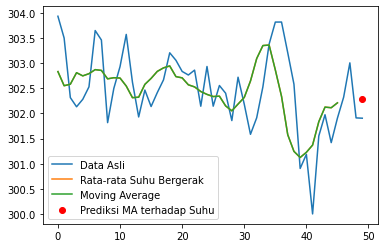

Evaluasi Model:
MSE: 0.4319441460869566
RMSE: 0.6572245781214794
MAE: 0.5033913043478274
MAPE: 0.16653761629899122


In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom suhu
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['temperature'].values[:50]

# Menghitung rata-rata bergerak dengan window 5
rolling_mean = np.convolve(data, np.ones(5)/5, mode='valid')

# Menghitung moving average dengan window 5
ma = pd.Series(data).rolling(window=5).mean().values[4:]

# Menghitung prediksi MA untuk tanggal 19/02/2017
prediksi = np.mean(data[46:51])
print('Prediksi Suhu MA untuk 19/02/2017:', prediksi)

# Menampilkan data asli dan hasil prediksi
plt.plot(data, label='Data Asli')
plt.plot(rolling_mean, label='Rata-rata Suhu Bergerak ')
plt.plot(ma, label='Moving Average')
plt.scatter(49, prediksi, color='r', label='Prediksi MA terhadap Suhu')
plt.legend()
plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mse = mean_squared_error(data[4:], ma)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(data[4:] - ma))
mape = np.mean(np.abs((data[4:] - ma) / data[4:])) * 100

# Menampilkan hasil evaluasi
print('Evaluasi Model:')
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)





In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Menghitung moving average dengan window 5
ma = np.convolve(data, np.ones(5)/5, mode='valid')

# Menghitung moving average dengan window 5 untuk hari berikutnya
next_day_ma = np.mean(data[-3:])

# Menghitung MSE, RMSE, MAE, dan MAPE
mse = mean_squared_error(data[4:], ma)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data[4:], ma)
mape = np.mean(np.abs((data[4:] - ma) / data[4:])) * 100

# Menampilkan evaluasi model
print('Evaluasi Model:')
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

# Menampilkan data asli dan hasil prediksi
plt.plot(data, label='Data Asli')
plt.plot(ma, label='Rata-rata Suhu Moving Average')
plt.scatter(50, next_day_ma, label='Prediksi MA untuk 19 Feb 2017', color='red')
plt.legend()
plt.show()

# Menampilkan prediksi moving average untuk hari berikutnya
print("Prediksi Suhu MA untuk hari berikutnya 20 Feb 2017: ", next_day_ma)


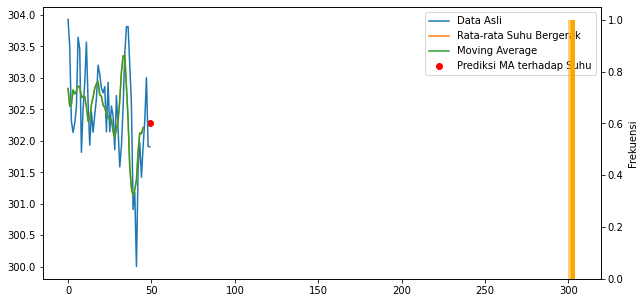

Evaluasi Model:
MSE: 0.4319441460869516
RMSE: 0.6572245781214756
MAE: 0.503391304347825
MAPE: 0.1665376162989904


In [47]:
# Menghitung frekuensi data suhu
rainfall_freq = df['temperature'].value_counts()

# Menampilkan data asli dan hasil prediksi
fig, ax = plt.subplots(figsize=(10, 5)) # Ukuran figure disesuaikan
plt.plot(data, label='Data Asli')
plt.plot(rolling_mean, label='Rata-rata Suhu Bergerak ')
plt.plot(ma, label='Moving Average')
plt.scatter(49, prediksi, color='r', label='Prediksi MA terhadap Suhu')
plt.legend()

# Menampilkan bar plot frekuensi suhu di bawah grafik
ax2 = ax.twinx() # Membuat axes kedua dengan sumbu y yang berbeda
ax2.bar(rainfall_freq.index, rainfall_freq.values, alpha=0.5, width=0.5, color='orange') # Menampilkan bar plot
ax2.grid(False) # Menghilangkan grid pada axes kedua
ax2.set_ylabel('Frekuensi') # Label sumbu y pada axes kedua

plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mse = mean_squared_error(data[4:], ma)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(data[4:] - ma))
mape = np.mean(np.abs((data[4:] - ma) / data[4:])) * 100

# Menampilkan hasil evaluasi
print('Evaluasi Model:')
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)
